In [1]:
%matplotlib inline

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/datasets/mtropics_laos.ipynb)

[![View Source on GitHub](https://img.shields.io/badge/github-view%20source-black.svg)](https://github.com/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/datasets/mtropics_laos.ipynb)


## Rainfall-runoff dataset of Laos


In [1]:
import site
site.addsitedir("D:\\mytools\\AI4Water")

In [ ]:
try:
    import ai4water
except ModuleNotFoundError:
    !pip install git+https://github.com/AtrCheema/AI4Water.git@197383e875cae63b3afbdbbce21f6c00db6ada44

In [29]:

import matplotlib.pyplot as plt

from easy_mpl import boxplot, hist
from easy_mpl import pie, plot

from ai4water.eda import EDA
from ai4water.eda import EDA
from ai4water.datasets import MtropicsLaos, ecoli_mekong
from ai4water.utils.utils import get_version_info


In [3]:

for lib, ver in get_version_info().items():
    print(lib, ver)

python 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:16) [MSC v.1916 64 bit (AMD64)]
os nt
ai4water 1.06
lightgbm 3.3.1
tcn 3.4.0
catboost 0.26
xgboost 1.5.0
easy_mpl 0.21.3
SeqMetrics 1.3.3
tensorflow 2.7.0
keras.api._v2.keras 2.7.0
numpy 1.21.0
pandas 1.3.4
matplotlib 3.4.3
h5py 3.5.0
sklearn 1.0.1
shapefile 2.3.0
fiona 1.8.22
xarray 0.20.1
netCDF4 1.5.7
optuna 2.10.1
skopt 0.9.0
hyperopt 0.2.7
plotly 5.3.1
lime NotDefined
seaborn 0.11.2


In [4]:
   
laos = MtropicsLaos(
    path="F:\\data\\MtropicsLaos"
)


    Not downloading the data since the directory 
    F:\data\MtropicsLaos already exists.
    Use overwrite=True to remove previously saved files and download again


### precipitation



In [31]:
pcp = laos.fetch_pcp(en="2019-12-31 23:54:00")
print(pcp.shape)


(1665359, 1)


In [32]:
pcp.head()

,pcp
2001-01-01 00:06:00,NaN
2001-01-01 00:12:00,NaN
2001-01-01 00:18:00,NaN
2001-01-01 00:24:00,NaN
2001-01-01 00:30:00,NaN


In [33]:
pcp.tail()

,pcp
2019-12-31 23:30:00,0.0
2019-12-31 23:36:00,0.0
2019-12-31 23:42:00,0.0
2019-12-31 23:48:00,0.0
2019-12-31 23:54:00,0.0


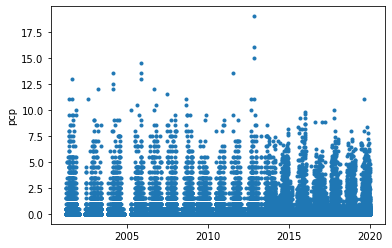

In [11]:
_ = plot(pcp, '.')

In [34]:
groupby_year = pcp.groupby(lambda x: x.year)

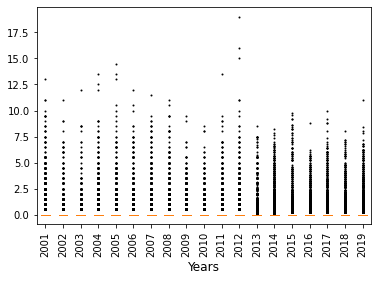

In [45]:

_ = boxplot(
    [grp.dropna().values.reshape(-1,) for _, grp in groupby_year],
    labels=[grp for grp, _ in groupby_year],
    flierprops={"ms": 1.0},
    ax_kws=dict(xlabel="Years", xlabel_kws=dict(fontsize=12))
)


In [47]:
for gname, grp in groupby_year:
    print(gname, sum(grp.isna().sum()))

2001 19764
2002 35978
2003 35732
2004 16633
2005 19608
2006 1
2007 1015
2008 2880
2009 2177
2010 9039
2011 10676
2012 16133
2013 5627
2014 775
2015 1127
2016 960
2017 2766
2018 1174
2019 1278


### weather station



In [48]:
w = laos.fetch_weather_station_data()
print(w.shape)

(166536, 4)


In [49]:
w.isna().sum()

air_temp      0
rel_hum       0
wind_speed    0
sol_rad       0
dtype: int64

In [50]:
w.head()

,air_temp,rel_hum,wind_speed,sol_rad
datetime,,,,
2001-01-01 01:00:00,18.3,99.5,1.0,28.0
2001-01-01 02:00:00,18.3,99.5,1.0,28.0
2001-01-01 03:00:00,18.3,99.5,1.0,28.0
2001-01-01 04:00:00,18.3,99.5,1.0,28.0
2001-01-01 05:00:00,18.3,99.5,1.0,28.0


In [51]:
w.tail()

,air_temp,rel_hum,wind_speed,sol_rad
datetime,,,,
2019-12-31 20:00:00,18.3,91.5,0.0,0.0
2019-12-31 21:00:00,18.3,90.8,0.0,0.0
2019-12-31 22:00:00,17.7,93.6,0.0,0.0
2019-12-31 23:00:00,17.3,95.1,0.0,0.0
2020-01-01 00:00:00,16.3,99.1,0.0,0.0


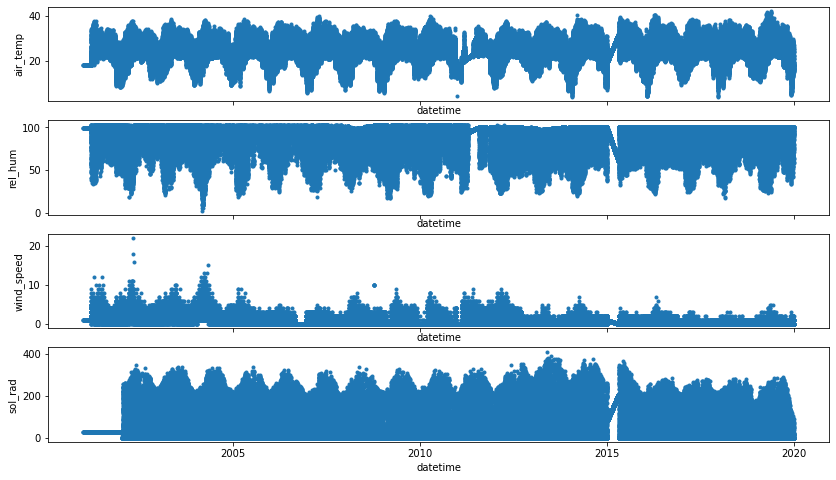

In [60]:


f, axes = plt.subplots(4, figsize=(14, 8), sharex="all")

for idx, ax in enumerate(axes.flatten()):
    
    _ = plot(w.iloc[:, idx], '.', ax=ax, show=False)

plt.show()


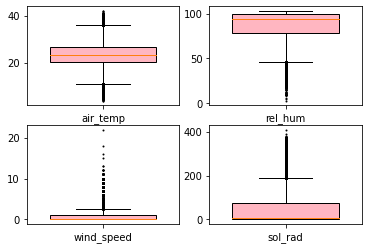

In [65]:
_ = boxplot(w, share_axes=False, flierprops={"ms": 1.0},
           widths=0.7,
            fill_color="lightpink", patch_artist=True,
           )

### Water Level and Suspended matter

In [66]:
wl, spm = laos.fetch_hydro()
print(wl.shape)

(454694, 1)


Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.


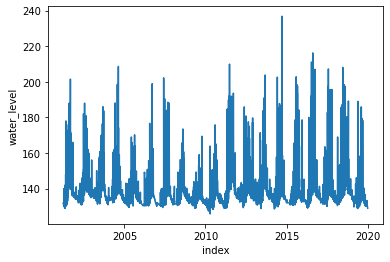

In [70]:
_ = plot(wl)

In [71]:
print(spm.shape)

(6428, 1)


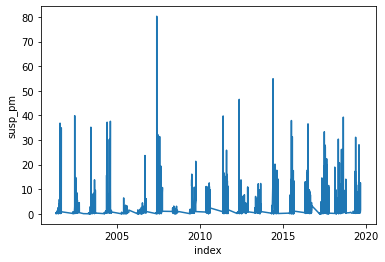

In [73]:
_ = plot(spm)

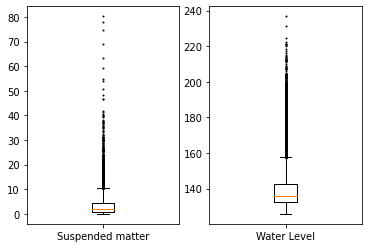

In [76]:
_ = boxplot(
    [spm.values.reshape(-1,), wl.values.reshape(-1,)],
    labels=["Suspended matter", "Water Level"],
    share_axes=False,
    flierprops={"ms": 1.0},
)

### Ecoli

In [79]:
ecoli = laos.fetch_ecoli()
print(ecoli.shape)

(409, 1)


In [80]:
print(ecoli.head())

                     Ecoli_mpn100
Date_Time                        
2011-05-25 10:00:00           NaN
2011-05-25 16:40:00        1100.0
2011-05-25 17:06:00        1400.0
2011-05-25 17:10:00           NaN
2011-05-25 17:24:00       14000.0


In [81]:
print(ecoli.tail())


                     Ecoli_mpn100
Date_Time                        
2021-02-25 14:10:00         250.0
2021-03-07 14:10:00         200.0
2021-03-17 15:11:00         290.0
2021-03-27 15:22:00         720.0
2021-04-06 15:05:00         560.0


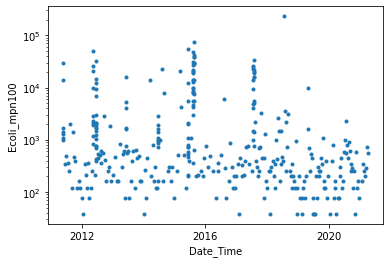

In [82]:
_ = plot(ecoli, '.', ax_kws=dict(logy=True))

In [83]:
ecoli_all = laos.fetch_ecoli(features='all')
print(ecoli_all.shape)

(409, 3)


In [84]:
ecoli_all.isna().sum()

Ecoli_LL_mpn100    60
Ecoli_mpn100       42
Ecoli_UL_mpn100    60
dtype: int64

In [11]:
ecoli_all.head()

,Ecoli_LL_mpn100,Ecoli_mpn100,Ecoli_UL_mpn100
Date_Time,,,
2011-05-25 10:00:00,NaN,NaN,NaN
2011-05-25 16:40:00,715.0,1100.0,1550.0
2011-05-25 17:06:00,1000.0,1400.0,1900.0
2011-05-25 17:10:00,NaN,NaN,NaN
2011-05-25 17:24:00,9000.0,14000.0,22000.0


In [12]:
phy_chem = laos.fetch_physiochem('T_deg')
print(phy_chem.shape)

(411, 1)


### pysiochemical attributes



In [85]:
phy_chem_all = laos.fetch_physiochem(features='all')
print(phy_chem_all.shape)

(411, 8)


In [86]:
phy_chem_all.isna().sum()

T_deg             63
EC_s/cm           27
DO_percent       101
DO_mgl           102
pH                94
ORP_mV           117
Turbidity_NTU     44
TSS_gL            92
dtype: int64

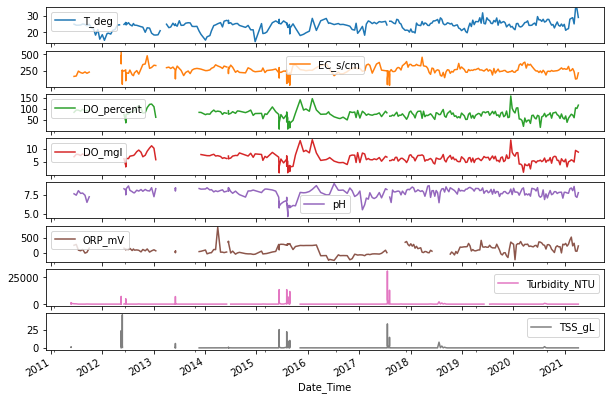

In [94]:
_ = phy_chem_all.plot(
    subplots=True,
    figsize=(10, 7)
)

In [95]:
phy_chem_all.head()

,T_deg,EC_s/cm,DO_percent,DO_mgl,pH,ORP_mV,Turbidity_NTU,TSS_gL
Date_Time,,,,,,,,
2011-05-25 10:00:00,24.11,273.0,87.5,7.34,7.67,53.5,13.5,NaN
2011-05-25 16:40:00,NaN,NaN,NaN,NaN,NaN,NaN,1380.0,0.8993
2011-05-25 17:06:00,NaN,NaN,NaN,NaN,NaN,NaN,1116.0,0.9932
2011-05-25 17:10:00,NaN,NaN,NaN,NaN,NaN,NaN,1392.0,1.1079
2011-05-25 17:24:00,NaN,NaN,NaN,NaN,NaN,NaN,702.0,1.3250


In [96]:
phy_chem_all.tail()

,T_deg,EC_s/cm,DO_percent,DO_mgl,pH,ORP_mV,Turbidity_NTU,TSS_gL
Date_Time,,,,,,,,
2021-02-25 14:10:00,28.86,287.0,72.2,5.55,8.05,232.3,11.54,0.011
2021-03-07 14:10:00,25.08,242.0,60.6,4.97,8.60,318.7,15.95,0.005
2021-03-17 15:11:00,34.45,130.0,104.8,9.48,7.33,61.3,7.29,0.001
2021-03-27 15:22:00,34.43,135.0,102.2,9.15,7.17,55.6,7.55,0.003
2021-04-06 15:05:00,29.01,222.0,117.0,8.81,7.79,229.5,8.52,0.018


### rain gauages



In [97]:
rg = laos.fetch_rain_gauges()
print(rg.shape)

(6939, 7)


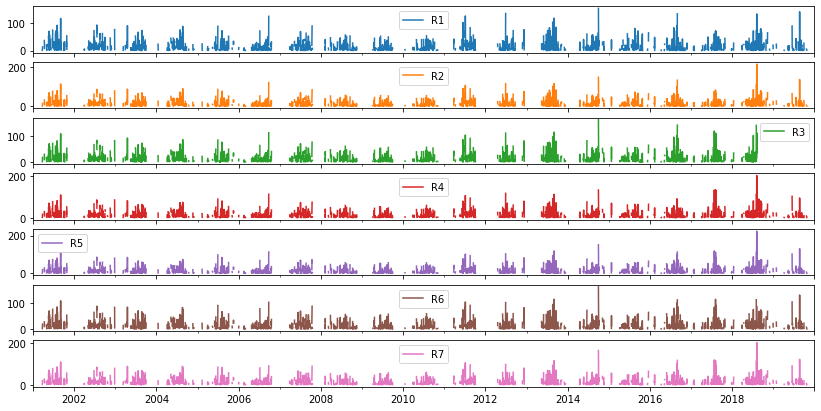

In [101]:
_ = rg.plot(
    subplots=True,
    sharex=True,
    figsize=(14, 7)
)

### regression



In [15]:
df = laos.make_regression()
print(df.shape)

D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\ai4water\datasets\mtropics.py:576: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return wl.loc[st:en], spm.loc[st:en]


(650741, 9)


In [16]:
df.head()

,air_temp,rel_hum,wind_speed,sol_rad,water_level,pcp,susp_pm,Ecoli_source,Ecoli_mpn100
2011-05-25 14:00:00,22.536906,96.167816,7.0,256.0,133.0,0.0,0.9,NaN,NaN
2011-05-25 14:06:00,22.537042,96.168046,6.7,246.2,133.0,0.0,0.9,NaN,NaN
2011-05-25 14:12:00,22.537179,96.168276,6.4,236.4,133.0,0.0,0.9,NaN,NaN
2011-05-25 14:18:00,22.537315,96.168506,6.1,226.6,133.0,0.0,0.9,NaN,NaN
2011-05-25 14:24:00,22.537452,96.168736,5.8,216.8,133.0,0.0,0.9,NaN,NaN


In [17]:
df = laos.make_regression(lookback_steps=30)
print(df.shape)

D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\ai4water\datasets\mtropics.py:576: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return wl.loc[st:en], spm.loc[st:en]


(5948, 9)


In [18]:
df.head()

,air_temp,rel_hum,wind_speed,sol_rad,water_level,pcp,susp_pm,Ecoli_source,Ecoli_mpn100
2011-05-25 14:00:00,22.536906,96.167816,7.0,256.0,133.0,0.0,0.9,NaN,NaN
2011-05-25 14:06:00,22.537042,96.168046,6.7,246.2,133.0,0.0,0.9,NaN,NaN
2011-05-25 14:12:00,22.537179,96.168276,6.4,236.4,133.0,0.0,0.9,NaN,NaN
2011-05-25 14:18:00,22.537315,96.168506,6.1,226.6,133.0,0.0,0.9,NaN,NaN
2011-05-25 14:24:00,22.537452,96.168736,5.8,216.8,133.0,0.0,0.9,NaN,NaN


In [19]:
print(df.isna().sum())

air_temp           0
rel_hum            0
wind_speed         0
sol_rad            0
water_level        0
pcp                0
susp_pm            0
Ecoli_source     105
Ecoli_mpn100    5690
dtype: int64


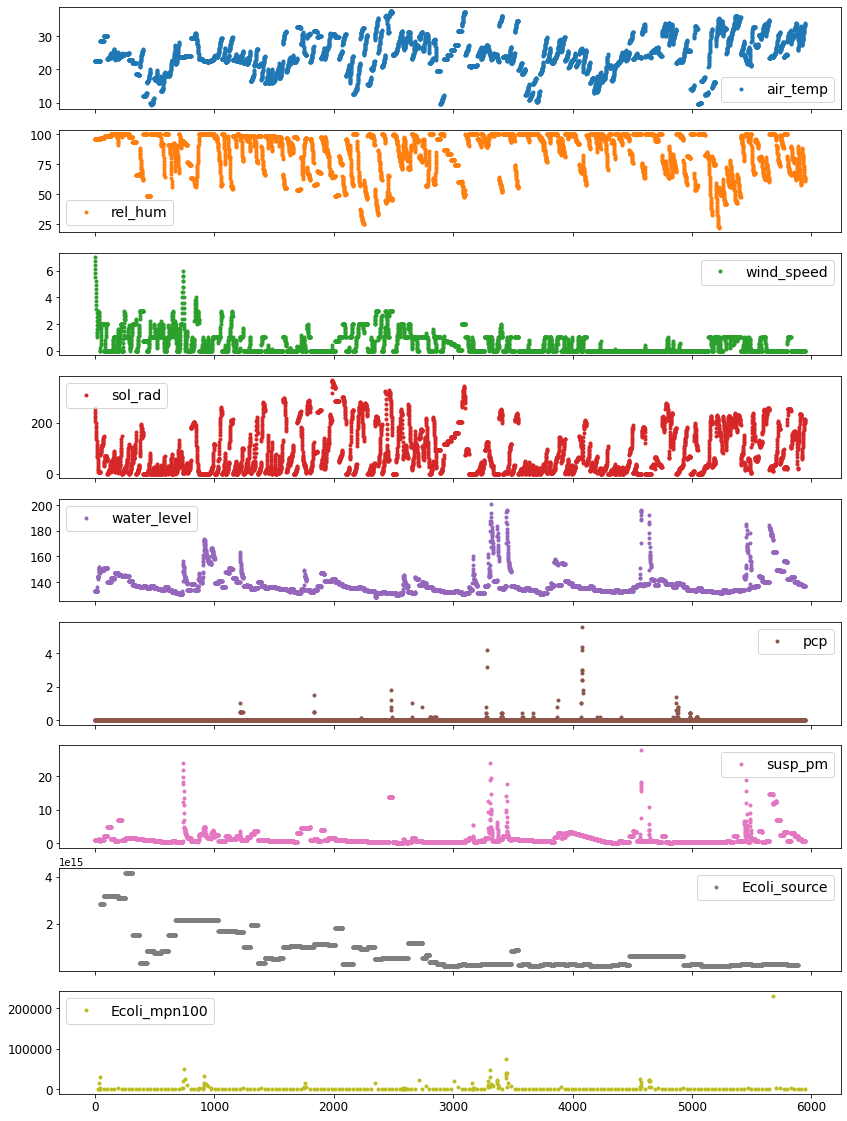

In [20]:
eda = EDA(data=df)
eda.plot_data(subplots=True, figsize=(14, 20),
              ignore_datetime_index=True)

### classification



In [21]:
df = laos.make_classification(lookback_steps=30)
print(df.shape)

D:\C\Anaconda3\envs\ai4w_dataset\lib\site-packages\ai4water\datasets\mtropics.py:576: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return wl.loc[st:en], spm.loc[st:en]


(5948, 9)


In [22]:
df.head()

,air_temp,rel_hum,wind_speed,sol_rad,water_level,pcp,susp_pm,Ecoli_source,Ecoli_mpn100
2011-05-25 14:00:00,22.536906,96.167816,7.0,256.0,133.0,0.0,0.9,NaN,NaN
2011-05-25 14:06:00,22.537042,96.168046,6.7,246.2,133.0,0.0,0.9,NaN,NaN
2011-05-25 14:12:00,22.537179,96.168276,6.4,236.4,133.0,0.0,0.9,NaN,NaN
2011-05-25 14:18:00,22.537315,96.168506,6.1,226.6,133.0,0.0,0.9,NaN,NaN
2011-05-25 14:24:00,22.537452,96.168736,5.8,216.8,133.0,0.0,0.9,NaN,NaN


In [23]:
print(df.isna().sum())

air_temp           0
rel_hum            0
wind_speed         0
sol_rad            0
water_level        0
pcp                0
susp_pm            0
Ecoli_source     105
Ecoli_mpn100    5690
dtype: int64


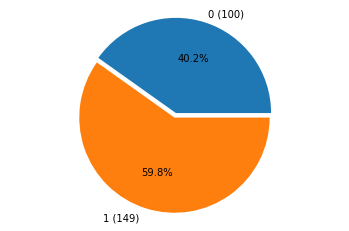

In [26]:
_ = pie(df.dropna().iloc[:, -1].values.astype(int), explode=(0, 0.05))

### ecoli_mekong



In [6]:
ecoli = ecoli_mekong()



    Not downloading the data since the directory 
    D:\mytools\AI4Water\ai4water\datasets\data\ecoli_houay_pano already exists.
    Use overwrite=True to remove previously saved files and download again

    Not downloading the data since the directory 
    D:\mytools\AI4Water\ai4water\datasets\data\ecoli_mekong_2016 already exists.
    Use overwrite=True to remove previously saved files and download again

    Not downloading the data since the directory 
    D:\mytools\AI4Water\ai4water\datasets\data\ecoli_mekong_loas already exists.
    Use overwrite=True to remove previously saved files and download again


Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.


In [7]:
print(ecoli.shape)

(1602, 10)


In [8]:
ecoli.isna().sum()

station_name           0
T                     72
EC                    77
DOpercent            192
DO                   252
pH                   191
ORP                  349
Turbidity             63
TSS                  269
E-coli_4dilutions     58
dtype: int64

In [9]:
ecoli.head()

,station_name,T,EC,DOpercent,DO,pH,ORP,Turbidity,TSS,E-coli_4dilutions
Date_Time,,,,,,,,,,
2011-05-25 10:00:00,Houay Pano,24.11,273.0,87.5,7.34,7.67,53.5,13.47,NaN,NaN
2011-05-25 16:40:00,Houay Pano,NaN,NaN,NaN,NaN,NaN,NaN,1380.00,0.899281,1100.0
2011-05-25 17:06:00,Houay Pano,NaN,NaN,NaN,NaN,NaN,NaN,1116.00,0.993190,1400.0
2011-05-25 17:10:00,Houay Pano,NaN,NaN,NaN,NaN,NaN,NaN,1392.00,1.107880,NaN
2011-05-25 17:24:00,Houay Pano,NaN,NaN,NaN,NaN,NaN,NaN,702.00,1.325030,14000.0


In [10]:
ecoli.tail()

,station_name,T,EC,DOpercent,DO,pH,ORP,Turbidity,TSS,E-coli_4dilutions
Date_Time,,,,,,,,,,
2021-03-17 12:48:00,Mekong,32.95,180.0,105.20,8.63,7.55,50.9,1.58,0.003,2500.0
2021-03-27 11:58:00,Mekong,33.81,193.0,103.50,9.03,7.32,54.4,10.64,0.002,1800.0
2021-04-06 09:30:00,Mekong,29.44,289.0,94.00,7.17,7.07,238.1,22.00,0.001,2200.0
2021-04-20 12:33:00,Mekong,25.51,180.0,86.24,6.48,6.88,296.7,11.13,0.027,1600.0
2021-05-25 12:22:00,Mekong,24.26,166.0,78.50,6.12,6.92,302.7,8.69,0.007,1000.0


In [13]:
ecoli.dropna().shape

(982, 10)

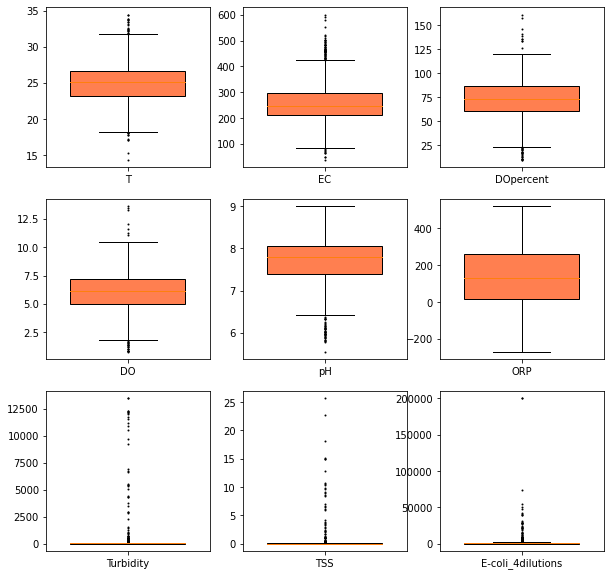

In [22]:
_ = boxplot(ecoli.dropna().iloc[:, 1:], share_axes=False,
            fill_color="coral", patch_artist=True,
           figsize=(10, 10),
            flierprops={"ms": 1.0},
            widths=0.7
           )

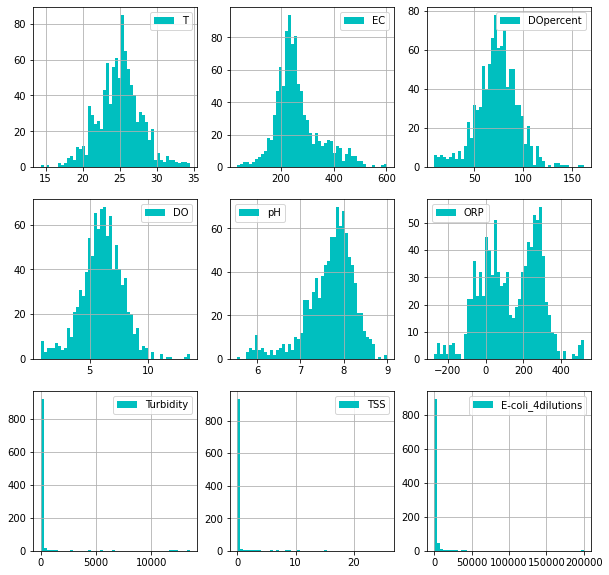

In [32]:
_ = hist(
    ecoli.dropna().iloc[:, 1:],
    share_axes=False,
    color = 'c',
    bins=50,
    subplots_kws = dict(figsize=(10, 10))
)

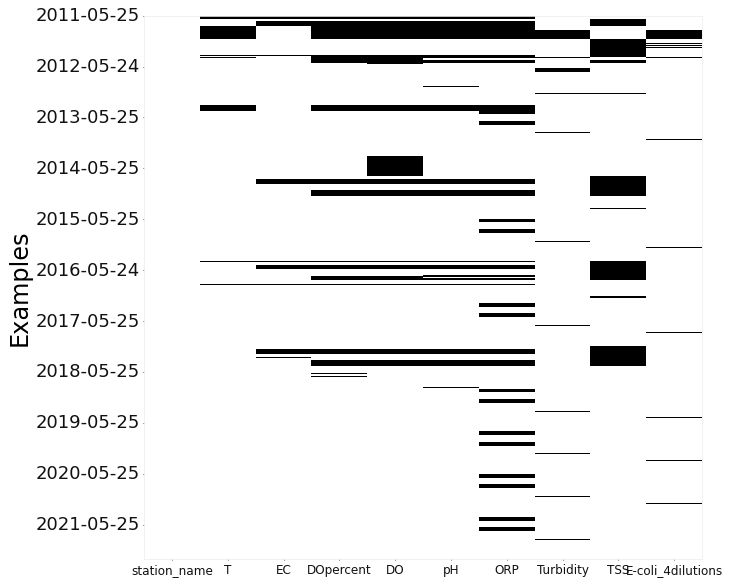

In [34]:
_ = EDA(ecoli).heatmap(figsize=(10, 10))

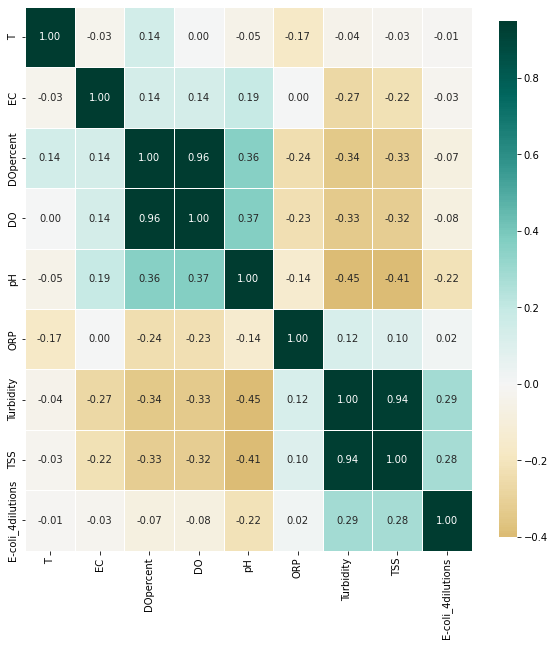

In [31]:


_ = EDA(ecoli.dropna()).correlation(figsize=(10, 10))
